In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
df = pd.read_csv('Data\\unicorn_companies.csv')
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [4]:
df.duplicated().any()

False

In [5]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'])

C:\Users\asada\AppData\Local\Temp\ipykernel_12240\2593295292.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Joined'] = pd.to_datetime(df['Date Joined'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


In [7]:
df.sort_values(by = 'Year Founded', ascending=False)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
782,Phantom,$1B,2022-01-31,Fintech,San Francisco,United States,North America,2021,$118M,"Paradigm, Andreessen Horowitz, Jump Capital"
714,Yidian Zixun,$1B,2017-10-17,Mobile & telecommunications,Beijing,China,Asia,2021,$151M,"Phoenix New Media, Tianjin Haihe Industry Fund"
822,GlobalBees,$1B,2021-12-28,E-commerce & direct-to-consumer,New Delhi,India,Asia,2021,$185M,"Chiratae Ventures, SoftBank Group, Trifecta Ca..."
554,ClickHouse,$2B,2021-10-28,Data management & analytics,Portola Valley,United States,North America,2021,$300M,"Lightspeed Venture Partners, Almaz Capital Par..."
952,LayerZero Labs,$1B,2022-03-30,Internet software & services,New York,United States,North America,2021,$143M,"Andreessen Horowitz, FTX Ventures, Tiger Globa..."
...,...,...,...,...,...,...,...,...,...,...
11,Epic Games,$32B,2018-10-26,Other,Cary,United States,North America,1991,$7B,"Tencent Holdings, KKR, Smash Ventures"
840,Radius Payment Solutions,$1B,2017-11-27,Fintech,Crewe,United Kingdom,Europe,1990,$200M,Inflexion Private Equity
699,Five Star Business Finance,$1B,2021-03-26,Other,Chennai,India,Asia,1984,$456M,"Sequoia Capital India, Tiger Global Management..."
373,Promasidor Holdings,$2B,2016-11-08,Consumer & retail,Bryanston,South Africa,Asia,1979,$556M,"IFC, Ajinomoto"


In [9]:
df['Year Founded'].value_counts()

Year Founded
2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2021     11
2000     11
2001      9
1999      8
2004      8
2003      8
1998      5
2002      4
1994      2
1995      2
1996      1
1919      1
1991      1
1979      1
1992      1
1984      1
1990      1
1993      1
1997      1
Name: count, dtype: int64

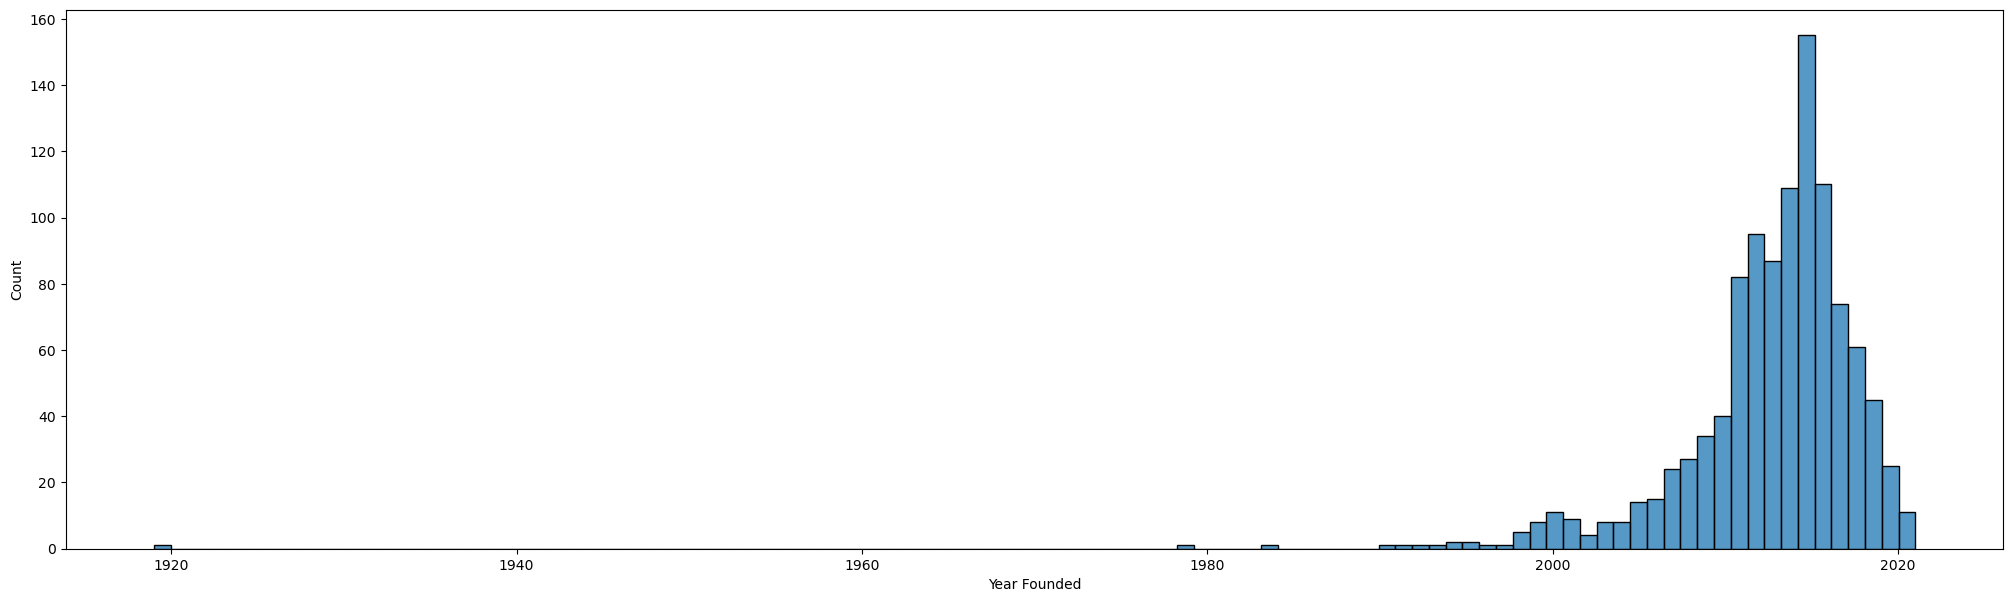

In [13]:
plt.figure(figsize=(25,7))
sns.histplot(df['Year Founded'])
plt.show()

In [15]:
df['Month Joined'] = df['Date Joined'].dt.month_name()
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


In [16]:
df['Years To Join'] = df['Date Joined'].dt.year - df['Year Founded']
df.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


In [17]:
df_interest_year = df[df['Date Joined'].dt.year == 2012]
df_interest_year

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years To Join
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
13,Fanatics,$27B,2012-06-06,E-commerce & direct-to-consumer,Jacksonville,United States,North America,2002,$4B,"SoftBank Group, Andreessen Horowitz, Temasek H...",June,10
546,Avant,$2B,2012-12-17,Artificial intelligence,Chicago,United States,North America,2012,$658M,"RRE Ventures, Tiger Global, August Capital",December,0
595,Trendy Group International,$2B,2012-02-13,Consumer & retail,Kowloon,Hong Kong,Asia,1999,$200M,L Capital Partners,February,13


In [18]:
df_interest_year.insert(3, "Week Joined", df_interest_year["Date Joined"].dt.strftime('%Y-W%V'), True)
companies_by_week_2012 = df_interest_year.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})
companies_by_week_2012.head()

,Week Joined,Company Count
0,2012-W07,1
1,2012-W23,1
2,2012-W48,1
3,2012-W51,1


In [19]:
df_2011 = df[df['Date Joined'].dt.year == 2011]
df_2011_2012 = pd.concat([df_2011, df_interest_year.drop('Week Joined', axis = 1)])
df_2011_2012['Quarter Joined'] = df_2011_2012['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df_2011_2012['Valuation'] = (df['Valuation']
                            .str.strip("$B")
                            .astype(float))

df_by_quarter_2011_2012 = df_2011_2012.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})
df_by_quarter_2011_2012.head()

,Quarter Joined,Average Valuation
0,2011-Q2,6.0
1,2011-Q4,46.0
2,2012-Q1,2.0
3,2012-Q2,27.0
4,2012-Q4,51.0


In [20]:
months = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
print(months)            

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


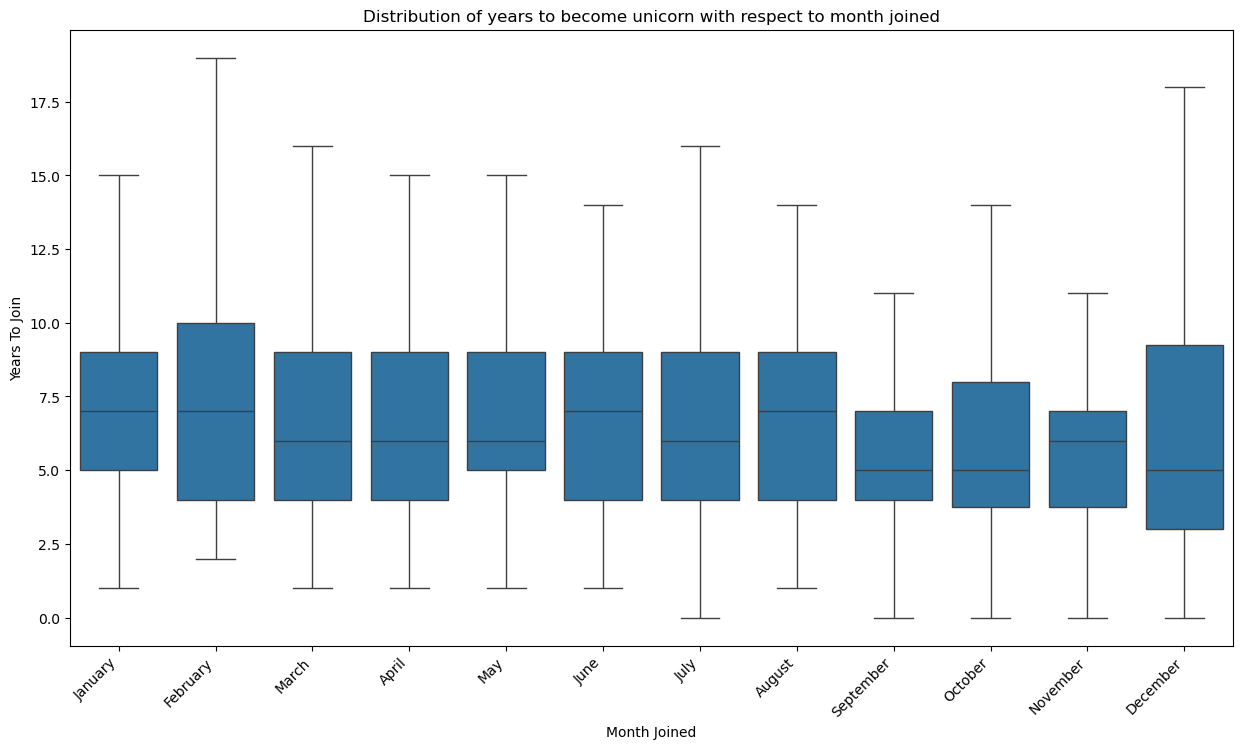

In [21]:
plt.figure(figsize = (15,8))
sns.boxplot(x = df['Month Joined'], y = df['Years To Join'], order = months, showfliers = False)
plt.title('Distribution of years to become unicorn with respect to month joined')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

C:\Users\asada\AppData\Local\Temp\ipykernel_12240\1057487116.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x = df['Year Founded'], y = df['Years To Join'], ci = False)


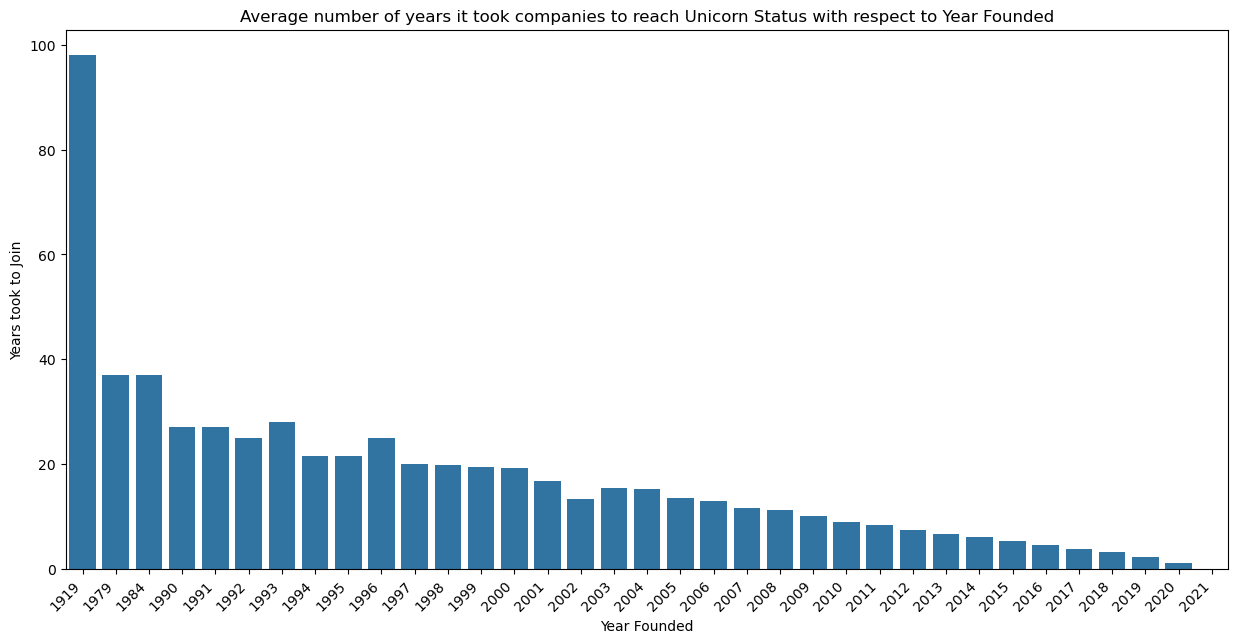

In [22]:
plt.figure(figsize = (15,7))
sns.barplot(x = df['Year Founded'], y = df['Years To Join'], ci = False)
plt.title("Average number of years it took companies to reach Unicorn Status with respect to Year Founded")
plt.xlabel("Year Founded")
plt.ylabel("Years took to Join")
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

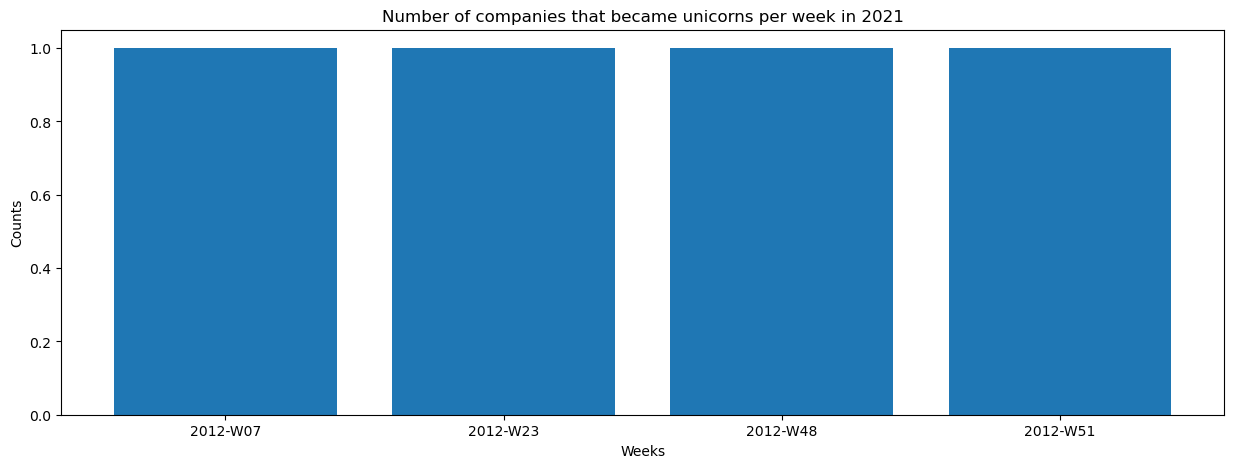

In [23]:
plt.figure(figsize = (15, 5))
plt.bar(x = companies_by_week_2012['Week Joined'], height = companies_by_week_2012['Company Count'])
plt.xlabel("Weeks")
plt.ylabel("Counts")
plt.title("Number of companies that became unicorns per week in 2021")
plt.show()


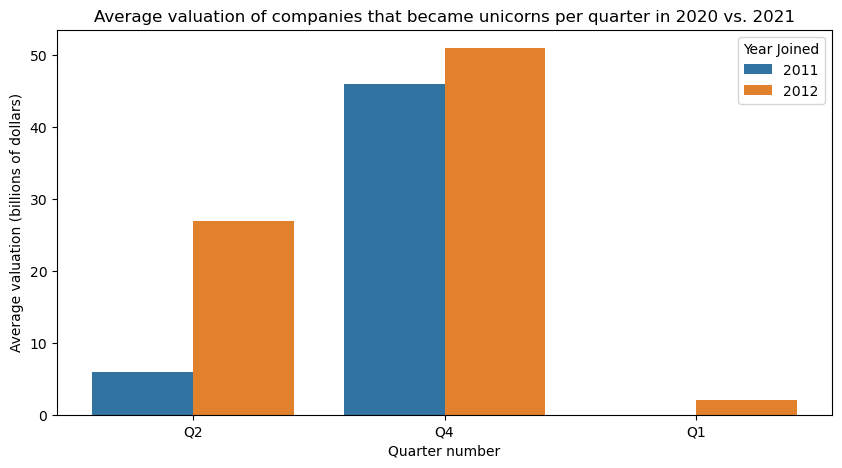

In [24]:
df_by_quarter_2011_2012['Quarter Number'] = df_by_quarter_2011_2012['Quarter Joined'].str[-2:]
df_by_quarter_2011_2012['Year Joined'] = df_by_quarter_2011_2012['Quarter Joined'].str[:4]
plt.figure(figsize = (10, 5))
sns.barplot(x=df_by_quarter_2011_2012['Quarter Number'],
            y=df_by_quarter_2011_2012['Average Valuation'],
            hue=df_by_quarter_2011_2012['Year Joined'])
plt.plot()
plt.xlabel("Quarter number")
plt.ylabel("Average valuation (billions of dollars)")
plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")
plt.show()